In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import joblib

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_2868\2257349139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=m_values,y=m_values.index,palette='viridis')


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

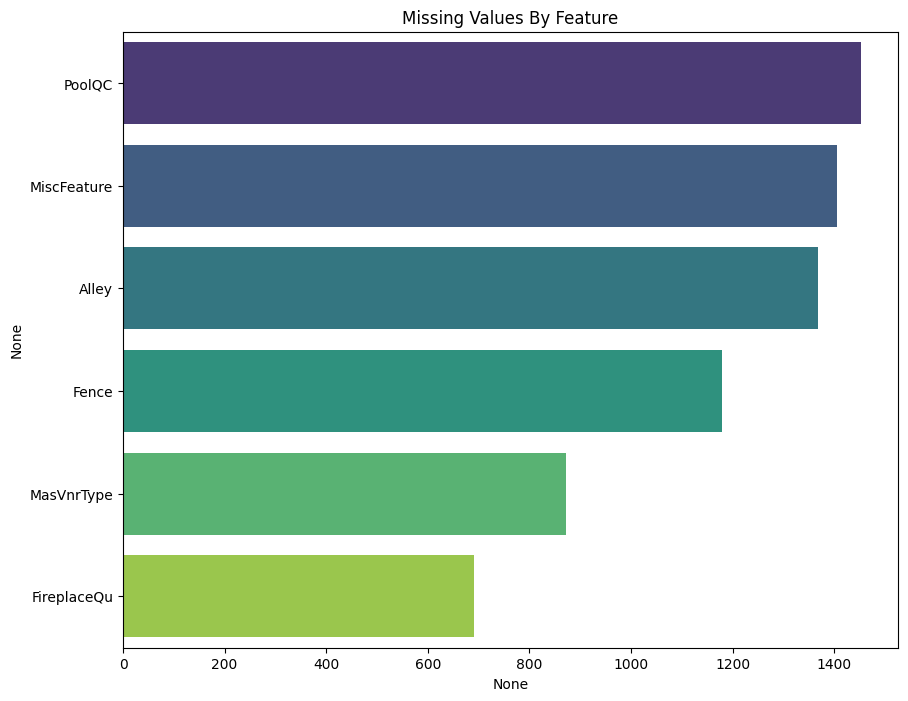

In [4]:
m_values = missing_values[missing_values>500]
plt.figure(figsize=(10,8))
sns.barplot(x=m_values,y=m_values.index,palette='viridis')
plt.title("Missing Values By Feature")
plt.xlable("Count of Missing Values")
plt.ylabel("Features")
plt.show()

In [8]:
df = df.drop(columns=['Id','Poo1QC','FireplaceQu','Fence','Alley','MiscFeature','MasVnrType'])
df

KeyError: "['Poo1QC'] not found in axis"

In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
c_columns = df.select_dtypes(include=['object','category']).columns
print("Categorical Columns: ")
print(c_columns)

Categorical Columns: 
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [19]:
label_encoder= LabelEncoder()
c_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

for col in c_columns:
    df[col] = label_encoder.fit_transform(df[col])

df

TypeError: 'LabelEncoder' object is not callable

In [27]:
corr_matrix = df.corr()
corr_with_price = corr_matrix['SalePrice'].sort_values(ascending=False)
print("Correlated Features", corr_with_price.head(20))

ValueError: could not convert string to float: 'RL'

✅ Top 20 Correlated Features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64


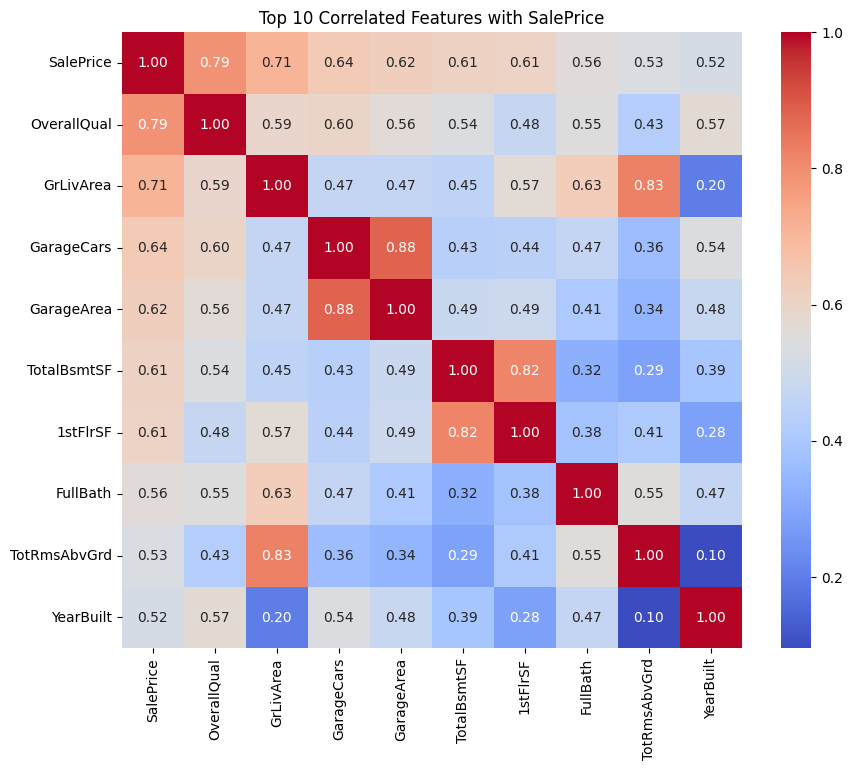

In [28]:
import numpy as np

# Only include numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Find top correlated features with SalePrice
corr_with_price = corr_matrix['SalePrice'].sort_values(ascending=False)

# Display top 20 correlated features
print("✅ Top 20 Correlated Features with SalePrice:")
print(corr_with_price.head(20))

# Plot heatmap for top 10 correlated features
top_features = corr_with_price.head(10).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 10 Correlated Features with SalePrice")
plt.show()


In [29]:
c_features = corr_with_price[corr_with_price>0.25].index
df = df[c_features]
df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea
0,208500,7,1710,2,548,856,856,2,8,2003,...,2003.0,196.0,0,706,65.0,0,854,61,1,8450
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,1976.0,0.0,1,978,80.0,298,0,0,0,9600
2,223500,7,1786,2,608,920,920,2,6,2001,...,2001.0,162.0,1,486,68.0,0,866,42,1,11250
3,140000,7,1717,3,642,756,961,1,7,1915,...,1998.0,0.0,1,216,60.0,0,756,35,0,9550
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,2000.0,350.0,1,655,84.0,192,1053,84,1,14260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,...,1999.0,0.0,1,0,62.0,0,694,40,1,7917
1456,210000,6,2073,2,500,1542,2073,2,7,1978,...,1978.0,119.0,2,790,85.0,349,0,0,0,13175
1457,266500,7,2340,1,252,1152,1188,2,9,1941,...,1941.0,0.0,2,275,66.0,0,1152,60,0,9042
1458,142125,5,1078,1,240,1078,1078,1,5,1950,...,1950.0,0.0,0,49,68.0,366,0,0,0,9717


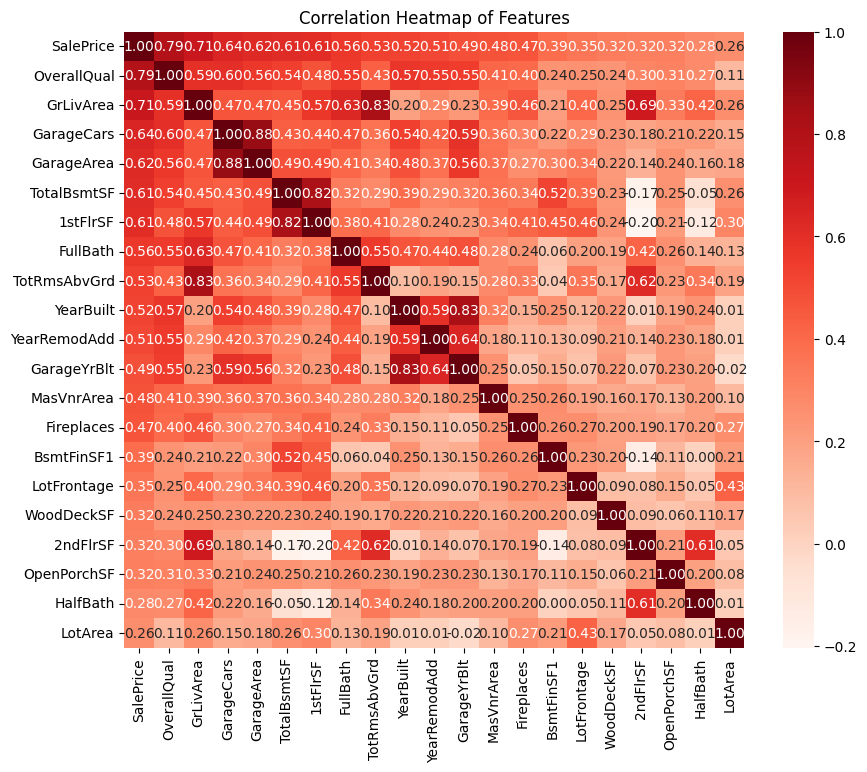

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df[corr_with_price[corr_with_price>0.25].index].corr(), annot=True, fmt='.2f',cmap='Reds')
plt.title("Correlation Heatmap of Features")
plt.show()

In [39]:
print(df.columns.tolist())

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'LotArea']


In [40]:
df.isnull().sum()

SalePrice         0
OverallQual       0
GrLivArea         0
GarageArea        0
1stFlrSF          0
FullBath          0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
WoodDeckSF        0
OpenPorchSF       0
LotArea           0
dtype: int64

In [42]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [43]:
df.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageArea      0
1stFlrSF        0
FullBath        0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
OpenPorchSF     0
LotArea         0
dtype: int64

In [44]:
x = df.drop('SalePrice' , axis=1)
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [45]:
x

,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,LotArea
0,7,1710,548,856,2,2003,2003,196.0,0,706,65.0,0,61,8450
1,6,1262,460,1262,2,1976,1976,0.0,1,978,80.0,298,0,9600
2,7,1786,608,920,2,2001,2002,162.0,1,486,68.0,0,42,11250
3,7,1717,642,961,1,1915,1970,0.0,1,216,60.0,0,35,9550
4,8,2198,836,1145,2,2000,2000,350.0,1,655,84.0,192,84,14260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,460,953,2,1999,2000,0.0,1,0,62.0,0,40,7917
1456,6,2073,500,2073,2,1978,1988,119.0,2,790,85.0,349,0,13175
1457,7,2340,252,1188,2,1941,2006,0.0,2,275,66.0,0,60,9042
1458,5,1078,240,1078,1,1950,1996,0.0,0,49,68.0,366,0,9717


In [46]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [49]:
model = XGBRegressor(
  objective='reg:squarederror',
  learning_rate = 0.01,
  max_depth = 6,
  n_estimators = 1000,
  subsample = 0.65,
  random_state = 42
)

model.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [50]:
y_pred = model.predict(x_test)

In [51]:
mae = mean_absolute_error(y_test,y_pred)
print("Mean_Absolute_Error: ", mae)

r2score = r2_score(y_test, y_pred)
print("R2 Score: ", r2score)

Mean_Absolute_Error:  18237.740234375
R2 Score:  0.8994775414466858


In [52]:
joblib.dump(model,'xgb_model.jb')

['xgb_model.jb']

In [53]:
df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'LotArea'],
      dtype='object')